### Tree models - Decision Trees

#### Import the necessary python packages

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### Load the CSV file

In [83]:
bank_train = pd.read_csv ("input/bank_train.csv")

In [84]:
bank_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,49,284,1,999,0,1.4,93.918,-42.7,4.957,5228.1,...,1,0,7,1,2,0,0,3,4,1
1,58,374,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,5,1,0,1,2,0,0,3,4,1
2,36,529,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,3,6,0,2,0,0,1,4,1
3,47,216,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,4,1,0,0,0,2,1,4,2,1
4,38,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,2,7,0,2,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,47,431,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,5,2,1,1,2,2,0,3,1,1
3291,40,94,4,999,0,1.4,93.918,-42.7,4.963,5228.1,...,4,2,3,0,0,0,0,3,4,1
3292,39,272,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,1,6,0,0,0,0,6,0,1
3293,44,107,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,...,1,1,0,0,0,0,0,7,2,1


#### Create the Dependent and Target Variables dataset

In [85]:
y = bank_train['purchased']
# Putting feature variable to X
X = bank_train.drop(['purchased'],axis=1)

#### Split the dataset into Train and Test dataset

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
_id = X_test['id']
X_test = X_test.drop(['id'],axis=1)
X_train = X_train.drop(['id'],axis=1)

#### Train the model using DecisionTreeClassifier

In [88]:
dt_default = DecisionTreeClassifier(max_depth=2)
dt_default.fit(X_train, y_train)
y_pred_default = dt_default.predict(X_test)

In [89]:
# Write the columns 'id' and 'predictions' into the output file
d = pd.DataFrame({'id': _id, 'bank_predicted': y_pred_default})

#### Write the predicted data into a CSV file

In [90]:
# Write the output
d.to_csv('output/bank_predictions.csv', sep=",",index=False)

#### Evaluation metrics for the model - Precision/Recall and Accuracy

In [99]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       981
           1       0.61      0.16      0.25       107

    accuracy                           0.91      1088
   macro avg       0.76      0.57      0.60      1088
weighted avg       0.88      0.91      0.88      1088



In [100]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[970  11]
 [ 90  17]]
0.9071691176470589


#### Visualizing the Decision Tree using skearn's tree module

In [101]:
from sklearn import tree

In [102]:
feature_names = X.columns
class_names = list(map(lambda name:  "Yes" if name else  "No" , dt_default.classes_))

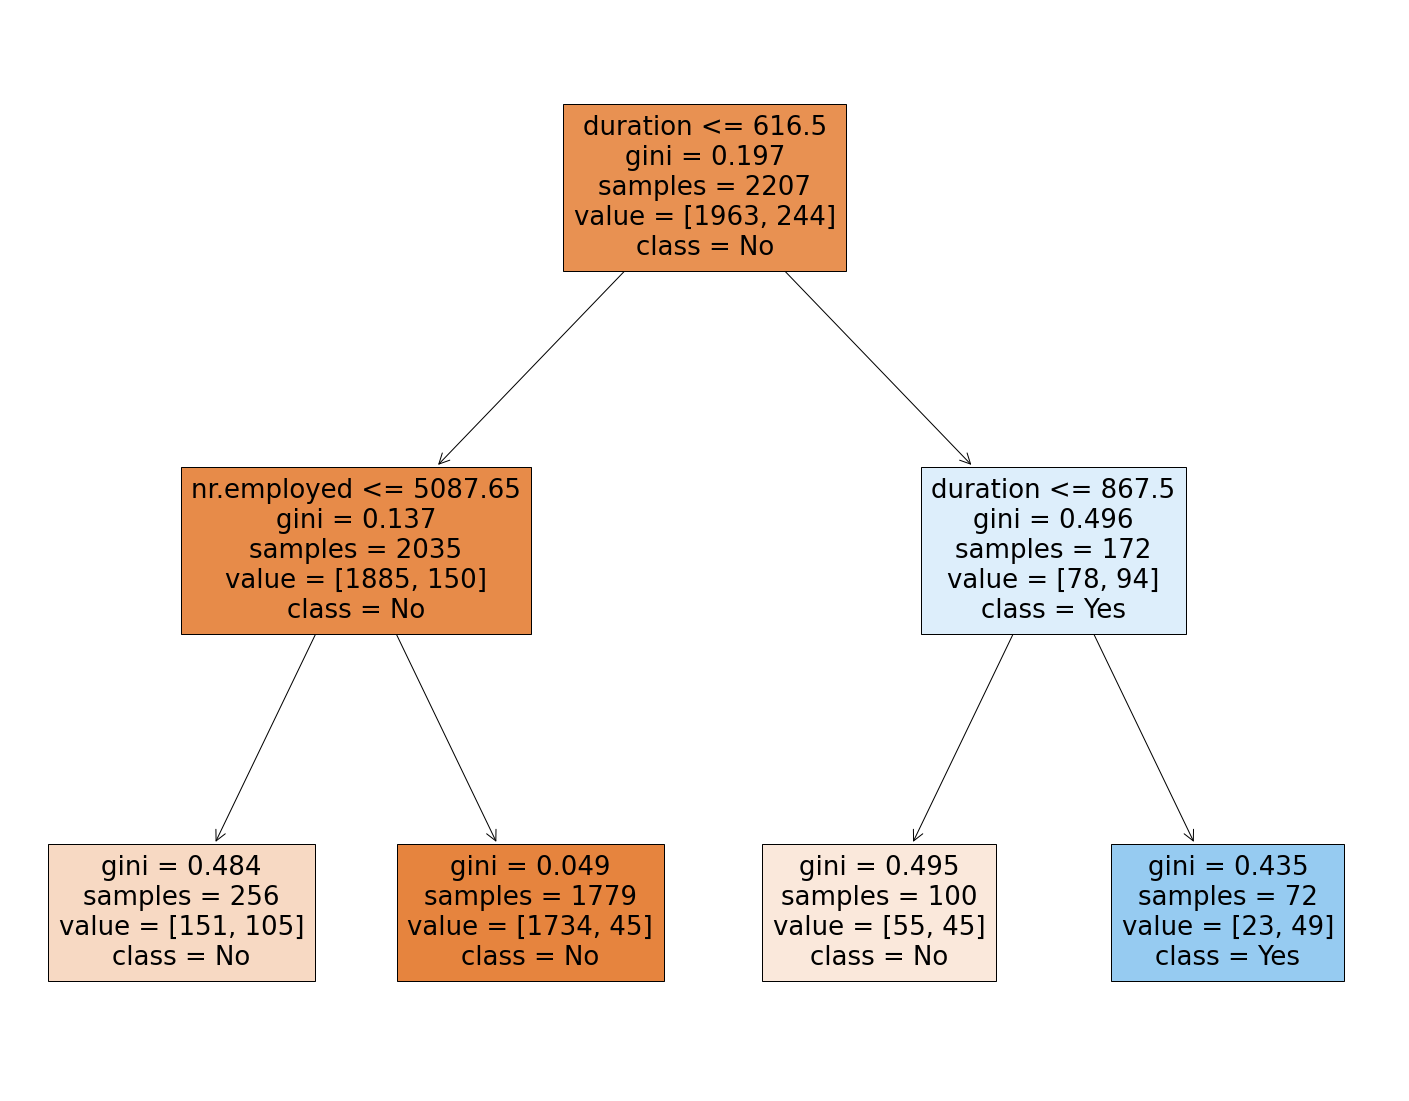

In [103]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_default, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)